In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import re
import string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
import nltk

In [3]:
data=pd.read_csv("E:/FlipRobo/Ratings Project/rating_dataset.csv")

In [4]:
data.head(3)

Unnamed: 0                                             Review  Rating
0        7192  \n\n  Never buy chip quality battery drain iss...       1
1        7193  \n\n  This mobile i used only 3 days and mobil...       1
2        7194  \n\n\n  Your browser does not support HTML5 vi...       1

<font color=blue> Cleaning the text of Review </font> 

In [5]:
alphanumeric=lambda x:re.sub('\w*\d\w*','',x)
punc_lower=lambda x:re.sub('[%s]'%re.escape(string.punctuation)," ", x.lower())
remove_underliner=lambda x:re.sub("\n"," ",x)
remove_non_ascii=lambda x:re.sub(r"[^\x00-\x7f]", r" ",x)
mult_spaces=lambda x:re.sub("\s+"," ",x)

In [6]:
data["Review"]=data["Review"].map(alphanumeric).map(punc_lower).map(remove_underliner).map(remove_non_ascii)

In [7]:
multiple_spaces=lambda x:re.sub(r"\s+", " ", x)
data["Review"]=data["Review"].map(multiple_spaces)

In [8]:
sing_char=lambda x:re.sub(r"\s+[a-zA-Z]\s+", " ", x)
data["Review"]=data["Review"].map(sing_char)

In [9]:
data["Review"][0:10]

0     never buy chip quality battery drain issues d...
1     this mobile used only days and mobile start s...
2     your browser does not support video here have...
3     phone display has been breaken it is mentione...
4     redmi note software is very bad xiaomi please...
5     mobile is lagging while scrolling screen is n...
6     battery is very bad battery is draining when ...
7     check wether both the speakers are working or...
8     toatl vest of money the mobile having touch i...
9     the processor with of ram fails to keep up wi...
Name: Review, dtype: object

<font color=blue> Word Cloud of Each Label</font> 

In [10]:
!pip install wordcloud

In [11]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [12]:
def wordcloud(df, rating, label):
    subset=df[df[rating]==label]
    text=subset.Review.values
    wc=WordCloud(background_color="white",max_words=1000)
    wc.generate (" ".join(text))
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words mostly used in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=123))

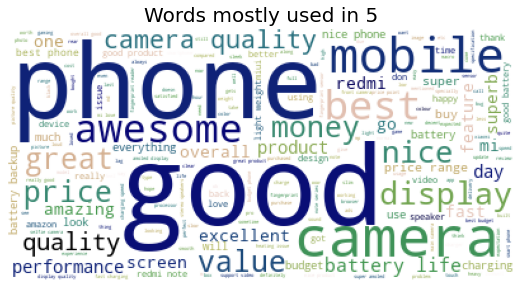

In [13]:
wordcloud(data, "Rating",5)

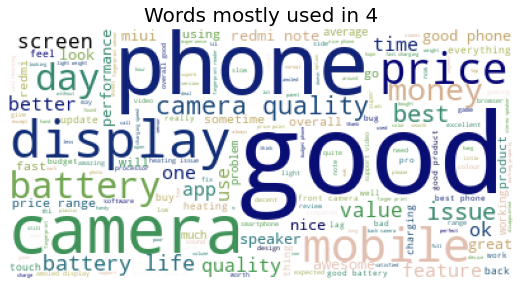

In [14]:
wordcloud(data, "Rating",4)

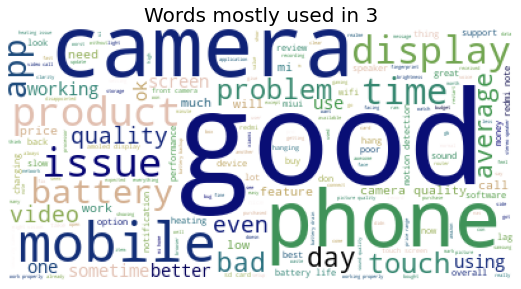

In [15]:
wordcloud(data, "Rating",3)

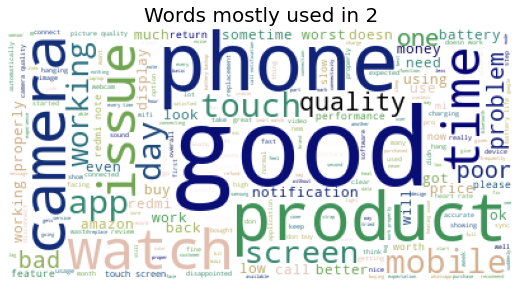

In [16]:
wordcloud(data, "Rating",2)

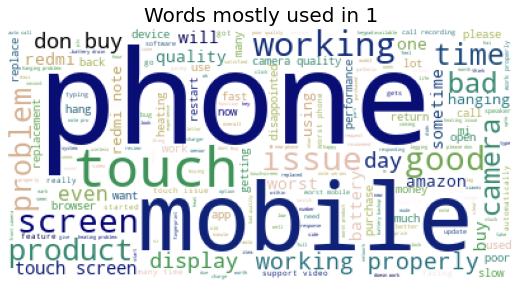

In [17]:
wordcloud(data, "Rating",1)

In [18]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.metrics import f1_score,precision_recall_curve, recall_score,fbeta_score, roc_auc_score,roc_curve, confusion_matrix, accuracy_score

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
def model_building(df, label, vectorizer, ngram):
    X=df["Review"]
    y=df[label]
    X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)
    cv1=vectorizer(ngram_range=(1,1), stop_words='english')
    X_train_cv1=cv1.fit_transform(X_train)
    X_train_cv2=X_train_cv1.toarray()
    X_test_cv1=cv1.transform(X_test)
    X_test_cv2=X_test_cv1.toarray()
    models=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), BernoulliNB(), SVC()]
    accuracy_scores=[]
    for model in models:
        model.fit(X_train_cv2, y_train)
        y_pred=model.predict(X_test_cv2)
        print("For Model", model, "Accuracy Score:", accuracy_score(y_pred, y_test) )

In [22]:
model_building(data, "Rating", TfidfVectorizer, (1,1))

C:\Users\IP G3\.conda\envs\tensorfloe-sessions\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For Model LogisticRegression() Accuracy Score: 0.6759124087591241
For Model GaussianNB() Accuracy Score: 0.6510948905109489
For Model DecisionTreeClassifier() Accuracy Score: 0.8445255474452554
For Model KNeighborsClassifier(n_neighbors=3) Accuracy Score: 0.535036496350365
For Model BernoulliNB() Accuracy Score: 0.6153284671532847
For Model SVC() Accuracy Score: 0.8306569343065694


In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
def model_building(df, label, vectorizer, ngram):
    X=df["Review"]
    y=df[label]
    X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)
    cv1=vectorizer(ngram_range=(1,1), stop_words='english')
    X_train_cv1=cv1.fit_transform(X_train)
    X_train_cv2=X_train_cv1.toarray()
    X_test_cv1=cv1.transform(X_test)
    X_test_cv2=X_test_cv1.toarray()
    models=[RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]
    accuracy_scores=[]
    for model in models:
        model.fit(X_train_cv2, y_train)
        y_pred=model.predict(X_test_cv2)
        print("For Model", model, "Accuracy Score:", accuracy_score(y_pred, y_test) )
        accuracy_scores.append(accuracy_score(y_pred, y_test))
    model_scores=pd.DataFrame({"Accuracy Scores": accuracy_scores}, index=["RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier"])
    
    return model_scores

In [24]:
model_scores=model_building(data, "Rating", TfidfVectorizer, (1,1))

For Model RandomForestClassifier() Accuracy Score: 0.8773722627737226
For Model AdaBoostClassifier() Accuracy Score: 0.45036496350364963
For Model GradientBoostingClassifier() Accuracy Score: 0.6051094890510949


In [25]:
X=data["Review"]
y=data["Rating"]
X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)
cv1=TfidfVectorizer(ngram_range=(1,1), stop_words='english')
X_train_cv1=cv1.fit_transform(X_train)
X_train_cv2=X_train_cv1.toarray()
X_test_cv1=cv1.transform(X_test)
X_test_cv2=X_test_cv1.toarray()
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
params=[{"n_estimators" :[100,200,300,400,500], "criterion":["gini","entropy"]}]
clf=GridSearchCV(model, params,cv=10 )
clf.fit(X_train_cv1,y_train)
clf.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [28]:
final_model=RandomForestClassifier(n_estimators=300, criterion="gini", random_state=42)
final_model.fit(X_train_cv1,y_train)
y_pred=final_model.predict(X_test_cv2)
print("Model: ", final_model)
print()
print()
print("Accuracy Score: ", accuracy_score(y_pred, y_test))
print()
print()
print("Confusion Matrix:", confusion_matrix(y_pred,y_test))
print()
print()
print("F1 Score: ", f1_score(y_test,y_pred,average='weighted'))

Model:  RandomForestClassifier(n_estimators=300, random_state=42)


Accuracy Score:  0.8854014598540146


Confusion Matrix: [[261   6   6   2   4]
 [ 18 252  11   4   2]
 [  2  15 215  11   5]
 [  3   9   8 237   5]
 [  1   3  19  23 248]]


F1 Score:  0.8852718139563069


In [31]:
from sklearn.externals import joblib
joblib.dump(final_model, "Rating_Predictor.obj")

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\IP G3\.conda\envs\tensorfloe-sessions\lib\site-packages\sklearn\externals\__init__.py)